In [117]:
import os
from collections import defaultdict
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#plt.style.use('ggplot')

In [118]:
# 改代码用于统计三个疾病结果中
# 每个基因的证据数量
# 每个基因对应的GO数量
# 每个基因对应的HPO数量

In [119]:
def print_sta_count(num_to_count: dict, save_file: str, pr=False):
    
    keys = sorted(num_to_count.keys(), key=lambda x: x)
    
    wf = open(save_file, 'w')
    wf.write(f'Number\tCount\n')
    for num in keys:
        if num == 0:
            continue
        if pr:
            print(f'{num}\t{num_to_count[num]}')
        
        wf.write(f'{num}\t{num_to_count[num]}\n')
        
    wf.close()
    print(f'{save_file} save done.')

In [120]:
# 统计每个基因在原始文件中有多少文本证据

evidence_file = "../data/AGAC_tagging_data/AD.pmc.tagging.txt"

gene_to_evidence = defaultdict(set)

with open(evidence_file) as f:
    for line in f:
        l = line.strip().split('\t')
        
        sent = l[2]
        
        tags = [eval(tag) for tag in l[3:]]
        
        for tag in tags:
            if tag[1] == 'Gene' and len(tag) == 4:
                gene_to_evidence[tag[2]].add(sent)
                

In [121]:
def interval_sta(evi_count_dict: dict):
    
    interval_sta = defaultdict(int)
    
    for num, cou in evi_count_dict.items():
        
        if num <= 10:
            interval_sta[10] += cou
        elif 10 <num <= 20:
            interval_sta[20] += cou
        elif 20 < num <= 30:
            interval_sta[30] += cou
        elif 30<num<=40:
            interval_sta[40] += cou
        elif 40<num<=50:
            interval_sta[50] += cou
    
    return interval_sta
        

In [ ]:
fig_save_path = 'Type in the path to be used for image storage' 

report_file = '../data/Supplementary_experiment/BreastCancer_dir_new/ensemble_result/BreastCancer.ensemble.final.txt'


In [ ]:

if not os.path.exists(fig_save_path):
    os.mkdir(fig_save_path)


In [249]:
# Breast cancer

gene_to_evi_count = defaultdict(int)

gene_to_go = defaultdict(set)

gene_to_hpo = defaultdict(set)


top_n = 255 

gene_to_mix_score = {}
line_count = 0
with open(report_file, encoding='utf-8') as f:
    f.readline()
    for line in f:
        l = line.strip().split('\t')
        
        entrez = l[0]
        symbol = l[1]
        mix_score = float(l[-1])
        
        gene_to_mix_score[entrez] = mix_score 
        
        
        evi_count = int(l[-6])
        
        tags = l[-3].split('  ')
        
        for tag in tags:
            if tag.startswith('Phenotype'):
                gene_to_hpo[entrez].add(tag)
            if tag.startswith('GO'):
                gene_to_go[entrez].add(tag)
        
        gene_to_evi_count[entrez] += evi_count
        
        
top_gene_list = list(sorted(gene_to_mix_score.keys(), key=lambda x: gene_to_mix_score[x], reverse=True))[:top_n]        

top_gene_set = set(top_gene_list)

print(f'top_gene: {len(top_gene_list)}')

top_gene: 255


In [250]:
# 打印全局的统计结果
go_set = set()
hpo_set = set()
sent_count = 0

for entrez in top_gene_list:
    go_set.update(gene_to_go[entrez])
    hpo_set.update(gene_to_hpo[entrez])
    sent_count += gene_to_evi_count[entrez]

print(f'Top {top_n}, Lit: {sent_count:,}, GO: {len(go_set):,}, HPO: {len(hpo_set):,}')

Top 255, Lit: 2,250, GO: 1,075, HPO: 27


In [251]:
evi_count_dict = defaultdict(int)
go_count_dict = defaultdict(int)
hpo_count_dict = defaultdict(int)

evi_count_list = []
go_count_list = []
hpo_count_list = []


for entrez in top_gene_list:
    #evi_count_dict[gene_to_evi_count[entrez]] += 1
    if len(gene_to_evidence[entrez]) != 0:
        evi_count_dict[len(gene_to_evidence[entrez])] += 1
        evi_count_list.append(len(gene_to_evidence[entrez]))
    
    if len(gene_to_go[entrez]) != 0:
        go_count_dict[len(gene_to_go[entrez])] += 1
        go_count_list.append(len(gene_to_go[entrez]))
    
    if len(gene_to_hpo[entrez]) != 0:
        hpo_count_dict[len(gene_to_hpo[entrez])] += 1
        hpo_count_list.append(len(gene_to_hpo[entrez]))

print(f'gene count: {len(evi_count_list):,}')
        
dis = 'BC'

evi_save_file = f'../result/result_statistics/{dis}.evi.tsv'

go_save_file = f'../result/result_statistics/{dis}.go.tsv'

hpo_save_file = f'../result/result_statistics/{dis}.hpo.tsv'

print_sta_count(evi_count_dict, evi_save_file)

print_sta_count(go_count_dict, go_save_file)

print_sta_count(hpo_count_dict, hpo_save_file)

gene count: 123
../result/result_statistics/BC.evi.tsv save done.
../result/result_statistics/BC.go.tsv save done.
../result/result_statistics/BC.hpo.tsv save done.


../result/Fig_Evi-GO-HPO/BC.evi.png save done.


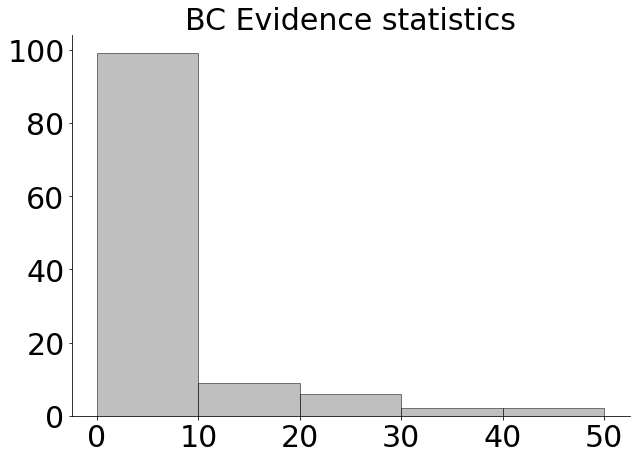

In [252]:
# 利用自动的plt.hist绘图

font_size = 30

fig, ax = plt.subplots(figsize=(10, 7))

#plt.figure(figsize=(10,7))
x = evi_count_list.copy()
bins = np.arange(0, 51, 10)
width=10

rects = ax.hist(x, bins=bins, color='gray', alpha=0.5, width=width, edgecolor='black')
#plt.hist(x, bins=5, color='gray', alpha=0.5, width=width)

bar_num = []
for i in rects[0]:
    bar_num.append(int(i))

#for i in bar_num:
#    plt.text(x=bins[bar_num.index(i)] + 3, y = i + 5, s= str(i), fontsize=font_size-10)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_title('AD Evidence statistics', fontsize=20,)
ax.set_title('BC Evidence statistics', font = {'family': 'Times New Roman',
         #'style': 'italic',
         'weight': 'normal',
        'size': font_size,
        }).set_ha("center")  

plt.tick_params(labelsize=font_size)

labels = ax.get_xticklabels() + ax.get_yticklabels()

a =[label.set_fontname('Times New Roman') for label in labels]

fig_save_file = f'{fig_save_path}/BC.evi.png'
plt.savefig(fig_save_file, dpi=600)

print(f'{fig_save_file} save done.')

../result/Fig_Evi-GO-HPO/BC.GO.png save done.


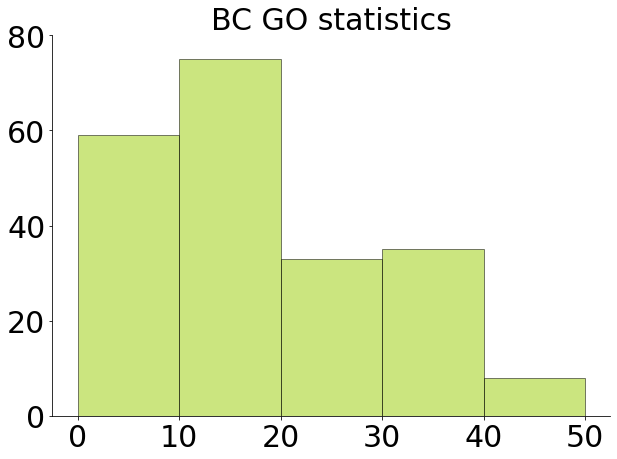

In [255]:
# 利用自动的plt.hist绘图

font_size = 30

fig, ax = plt.subplots(figsize=(10, 7))

x = go_count_list.copy()
bins = np.arange(0, 51, 10)
width=10

rects = ax.hist(x, bins=bins, color='#99cc00', alpha=0.5, width=width, edgecolor='black')

bar_num = []
for i in rects[0]:
    bar_num.append(int(i))

#for idx, i in enumerate(bar_num):
#    plt.text(x=bins[idx] + 3, y = i +2, s= str(i), fontsize=font_size-10)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_title('AD Evidence statistics', fontsize=20,)
ax.set_title('BC GO statistics', font = {'family': 'Times New Roman',
         #'style': 'italic',
         'weight': 'normal',
        'size': font_size,
        }).set_ha("center")  

plt.tick_params(labelsize=font_size)

labels = ax.get_xticklabels() + ax.get_yticklabels()

a =[label.set_fontname('Times New Roman') for label in labels]

#ax.set_xlim(0,50)
ax.set_yticks(np.arange(0, 100, 20))

fig_save_file = f'{fig_save_path}/BC.GO.png'
plt.savefig(fig_save_file, dpi=600)


print(f'{fig_save_file} save done.')

In [256]:
bar_num

[59, 75, 33, 35, 8]

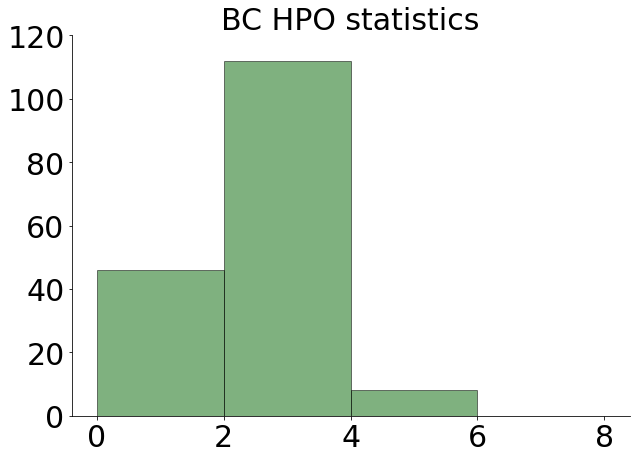

In [260]:
# 利用自动的plt.hist绘图

font_size = 30

fig, ax = plt.subplots(figsize=(10, 7))

x = hpo_count_list.copy()
bins = np.arange(0, 9, 2)
width=2

rects = ax.hist(x, bins=bins, color='darkgreen', alpha=0.5, width=width, edgecolor='black')

bar_num = []
for i in rects[0]:
    bar_num.append(int(i))

#for i in bar_num:
#    plt.text(x=bins[bar_num.index(i)] + 0.6, y = i + 2, s= str(i), fontsize=font_size-10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('BC HPO statistics', font = {'family': 'Times New Roman',
         #'style': 'italic',
         'weight': 'normal',
        'size': font_size,
        }).set_ha("center")  

plt.tick_params(labelsize=font_size)

ax.set_yticks(np.arange(0, 121, 20))

labels = ax.get_xticklabels() + ax.get_yticklabels()

a =[label.set_fontname('Times New Roman') for label in labels]

fig_save_file = f'{fig_save_path}/BC.HPO.png'
plt.savefig(fig_save_file, dpi=600)